IMPORTING LIBRARIES

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

LOADING DATA

In [2]:
txt_df=pd.read_csv('Grocery_Data.csv')

In [3]:
txt_df.head()

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,Rice,95,92,2.8,0.6,0.00323,0.08906
1,Sugar,37,27,10.0,0.8,0.00106,0.01991
2,Wheat,34,26,8.5,0.6,0.00328,0.03778
3,Biscuits,32,30,2.8,0.7,0.00000,0.08562
4,Shampoo,62,45,16.0,1.0,0.00079,0.02637


In [4]:
txt_df.shape

(250, 7)

In [5]:
txt_df.describe()

,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,60.620000,51.596000,9.034400,1.500400,0.001366,0.050986
std,28.318959,24.182223,7.433913,0.839511,0.001579,0.029084
min,10.000000,9.000000,0.000000,0.100000,0.000000,0.000370
25%,37.000000,32.000000,3.100000,0.800000,0.000000,0.025528
50%,57.000000,50.500000,7.150000,1.400000,0.000690,0.051620
75%,85.750000,71.750000,12.975000,2.200000,0.002560,0.076580
max,110.000000,105.000000,29.700000,3.100000,0.006150,0.099430


In [6]:
txt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Products                 250 non-null    object 
 1   Avg_Price_per_unit       250 non-null    int64  
 2   Cost_per_unit            250 non-null    int64  
 3   Average_Profit_per_unit  250 non-null    float64
 4   Average_units_sold       250 non-null    float64
 5   Incremental_acquisition  250 non-null    float64
 6   Increase_sale_volume     250 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 13.8+ KB


CHECKING NULL VALUES

In [7]:
txt_df.isnull().sum()

Products                   0
Avg_Price_per_unit         0
Cost_per_unit              0
Average_Profit_per_unit    0
Average_units_sold         0
Incremental_acquisition    0
Increase_sale_volume       0
dtype: int64

PLOTTING BOXPLOT 

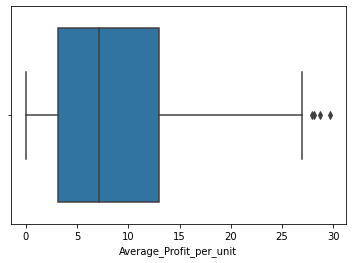

In [10]:
box = sns.boxplot(txt_df['Average_Profit_per_unit'])

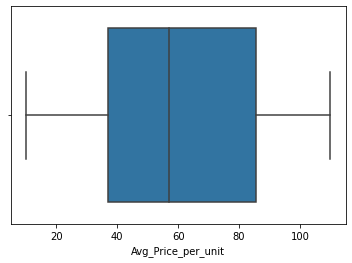

In [11]:
box = sns.boxplot(txt_df['Avg_Price_per_unit'])

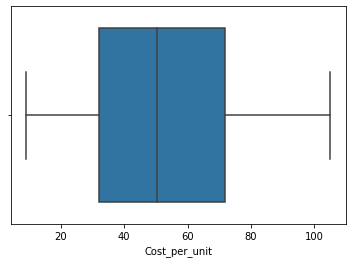

In [8]:
box = sns.boxplot(txt_df['Cost_per_unit'])

In [8]:
from scipy.stats import iqr
q1 = txt_df['Average_Profit_per_unit'].quantile(0.25)
q2 = txt_df['Average_Profit_per_unit'].quantile(0.75)
inter_qr=iqr(txt_df['Average_Profit_per_unit'])
print (q1)
print (q2)
print (inter_qr)

3.1
12.975
9.875


In [9]:
txt_df['Outliers'] = 0
txt_df['Outliers'] = np.where(txt_df['Average_Profit_per_unit']>(q2+1.5*inter_qr),1,txt_df['Outliers'])
txt_df['Outliers'] = np.where(txt_df['Average_Profit_per_unit']<(q1-1.5*inter_qr),1,txt_df['Outliers'])
txt_df.head()

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume,Outliers
0,Rice,95,92,2.8,0.6,0.00323,0.08906,0
1,Sugar,37,27,10.0,0.8,0.00106,0.01991,0
2,Wheat,34,26,8.5,0.6,0.00328,0.03778,0
3,Biscuits,32,30,2.8,0.7,0.00000,0.08562,0
4,Shampoo,62,45,16.0,1.0,0.00079,0.02637,0


In [10]:
txt_df.Outliers.value_counts()

0    246
1      4
Name: Outliers, dtype: int64

In [11]:
txt_dfclean = txt_df[txt_df['Outliers']==0]
print(txt_df.shape)
print(txt_dfclean.shape)

(250, 8)
(246, 8)


In [12]:
txt_dfclean=txt_dfclean.drop(columns=['Outliers','Products'])
txt_dfclean.shape

(246, 6)

In [13]:
txt_dfclean.head()

,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,95,92,2.8,0.6,0.00323,0.08906
1,37,27,10.0,0.8,0.00106,0.01991
2,34,26,8.5,0.6,0.00328,0.03778
3,32,30,2.8,0.7,0.00000,0.08562
4,62,45,16.0,1.0,0.00079,0.02637


In [14]:
txt_dfclean.dtypes

Avg_Price_per_unit           int64
Cost_per_unit                int64
Average_Profit_per_unit    float64
Average_units_sold         float64
Incremental_acquisition    float64
Increase_sale_volume       float64
dtype: object

CORRELATION MATRIX

<AxesSubplot:>

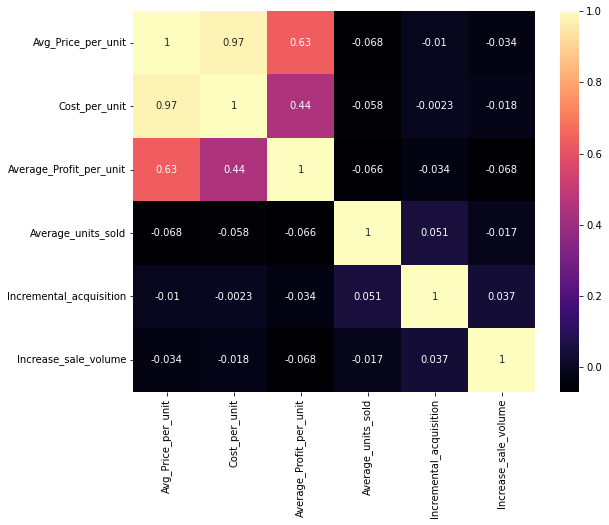

In [140]:
plt.figure(figsize = (9,7))
corr = txt_dfclean.corr()
sns.heatmap(corr, annot=True, cmap='magma')

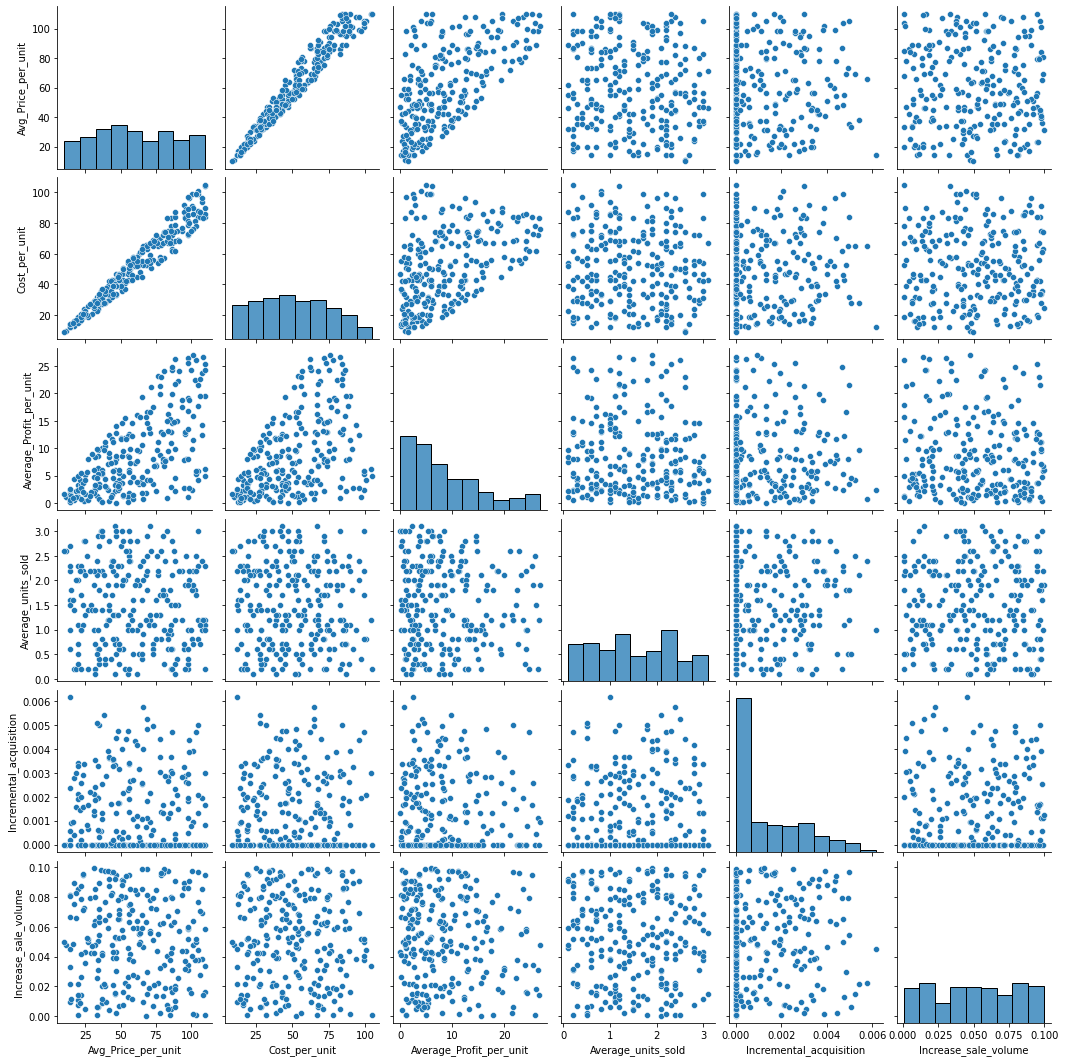

In [29]:
sns.pairplot(txt_dfclean)

<AxesSubplot:xlabel='Avg_Price_per_unit', ylabel='Density'>

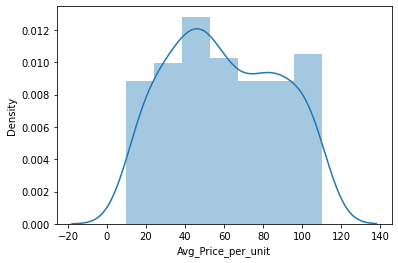

In [97]:
sns.distplot(txt_dfclean['Avg_Price_per_unit'])

<AxesSubplot:xlabel='Average_Profit_per_unit', ylabel='Density'>

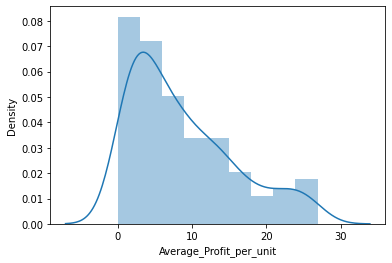

In [99]:
sns.distplot(txt_dfclean['Average_Profit_per_unit'])

<AxesSubplot:xlabel='Cost_per_unit', ylabel='Density'>

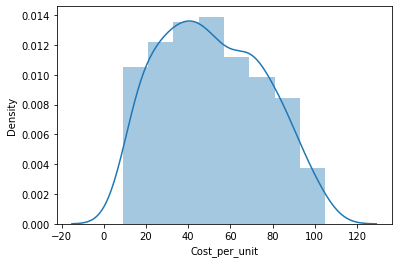

In [98]:
sns.distplot(txt_dfclean['Cost_per_unit'])

<AxesSubplot:xlabel='Increase_sale_volume', ylabel='Density'>

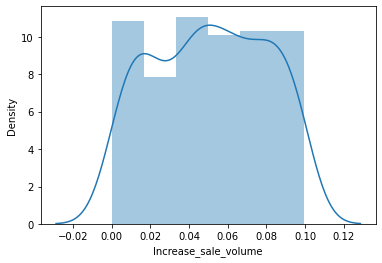

In [101]:
sns.distplot(txt_dfclean['Increase_sale_volume'])

<AxesSubplot:xlabel='Average_units_sold', ylabel='Density'>

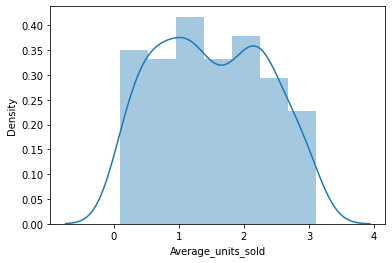

In [100]:
sns.distplot(txt_dfclean['Average_units_sold'])

In [15]:
X=txt_dfclean.iloc[:,1:3]
y=txt_dfclean.iloc[:,0]

In [16]:
X

,Cost_per_unit,Average_Profit_per_unit
0,92,2.8
1,27,10.0
2,26,8.5
3,30,2.8
4,45,16.0
...,...,...
245,21,2.0
246,57,1.5
247,15,0.9
248,71,13.2


In [17]:
y

0      95
1      37
2      34
3      32
4      62
       ..
245    23
246    59
247    16
248    84
249    38
Name: Avg_Price_per_unit, Length: 246, dtype: int64

TRAINING THE DATA

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(196, 2)
(50, 2)
(196,)
(50,)


**IMPLEMENTING ML MODELS**

OLS MODEL (ORDINARY LEAST SQUARE MODEL)

In [19]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [20]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Avg_Price_per_unit   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.434e+06
Date:                Wed, 06 Oct 2021   Prob (F-statistic):                        0.00
Time:                        10:45:10   Log-Likelihood:                         -106.02
No. Observations:                 196   AIC:                                      216.0
Df Residuals:                     194   BIC:                                      222.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [21]:
pred=model.predict(x_test)
data=list(zip(y_test,pred))

In [22]:
comptab=pd.DataFrame(data,columns=['Actual','Predicted'])
comptab.head()

,Actual,Predicted
0,56,55.490716
1,53,52.506413
2,27,26.573263
3,57,56.853623
4,46,46.162482


In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,pred)
rmse = sqrt(mse)
rmse, mse

(0.47324997207504554, 0.2239655360690314)

IMPLEMENTING LINEAR REGRESSION MODEL

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
regr=LinearRegression()

In [40]:
regr.fit(x_train,y_train)

LinearRegression()

In [43]:
coeff_df=pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])

In [44]:
coeff_df

,Coefficient
Cost_per_unit,0.997956
Average_Profit_per_unit,1.002234


In [45]:
predictions=regr.predict(x_test)

In [46]:
predictions

array([ 55.50737595,  52.52634357,  26.61555112,  56.86772211,
        46.18660302,  49.67730841,  37.19216875,  13.84685374,
        39.10069078,  42.22044937,  64.31847587,  35.50976202,
        42.43373039,  22.54489601, 109.35236772,  43.3100721 ,
        74.64330963,  98.14874133, 101.82705916,  83.2667971 ,
        79.45830924,  74.12508042,  50.5004858 , 109.86386791,
        65.58715485,  52.40045164,  32.81228736,  48.27845939,
       109.42692251,  28.21484686,  59.27736096,  81.53305323,
        20.13097907,  71.03954659,  36.4160504 , 103.45202347,
        56.89339068,  33.20462463,  80.63104295, 100.80343504,
        98.47935809,  39.33108417,  91.2761101 ,  34.31135974,
        63.45251752,  57.18122649, 102.87207376,  88.82796839,
        89.67681436,  13.24123546])

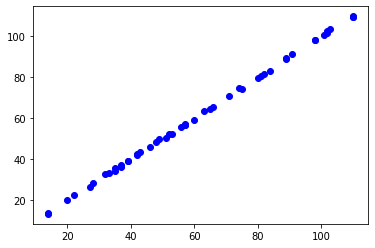

In [47]:

plt.scatter(y_test, predictions, color ='Blue')


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    model.fit(X, y)
    pred = model.predict(X)
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.18243340365836616
CV Score: 0.18941432398286617
0.9997084335378872


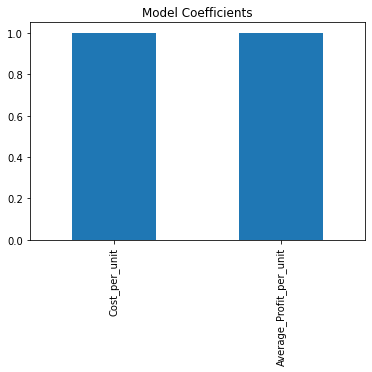

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
accuracy=model.score(x_test,y_test)
print(accuracy)

IMPLEMENTING RIDGE MODEL

Model Report
MSE: 151.094306770667
CV Score: 152.50278747144844
0.8183970350701903


<AxesSubplot:title={'center':'Model Coefficients'}>

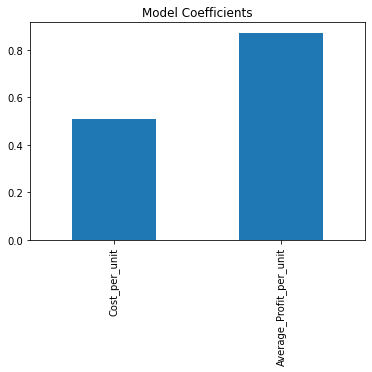

In [52]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
accuracy=model.score(x_test,y_test)
print(accuracy)
coef.plot(kind='bar', title="Model Coefficients")

IMPLEMENTING LASSO 

Model Report
MSE: 286.12372378717265
CV Score: 240.34907344457338
0.610441377929978


<AxesSubplot:title={'center':'Model Coefficients'}>

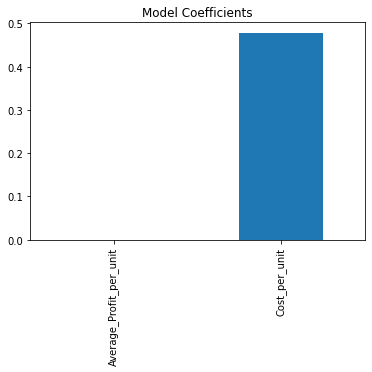

In [53]:
model = Lasso(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
accuracy=model.score(x_test,y_test)
print(accuracy)
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.0020325203252032522
CV Score: 8.970387755102042


<AxesSubplot:title={'center':'Feature Importance'}>

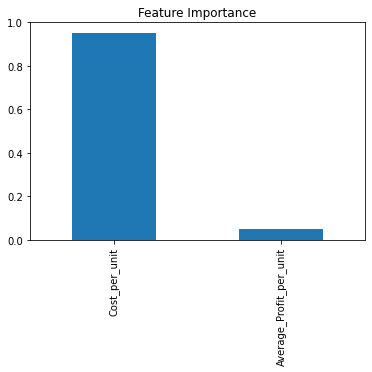

In [54]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
accuracy=model.score(x_test,y_test)
print(accuracy)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")


RANDOMFOREST REGREESSION

Model Report
MSE: 0.3770544000677511
CV Score: 3.5550323269762125
0.9994465964492365


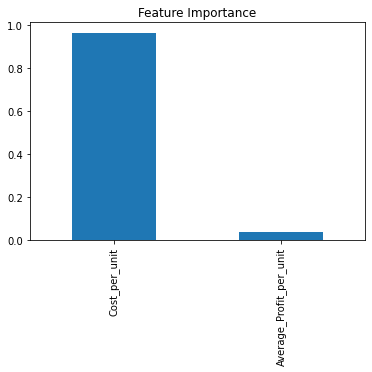

In [124]:
from sklearn.ensemble import c
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")
accuracy=model.score(x_test,y_test)
print(accuracy)

<AxesSubplot:xlabel='Incremental_acquisition', ylabel='Avg_Price_per_unit'>

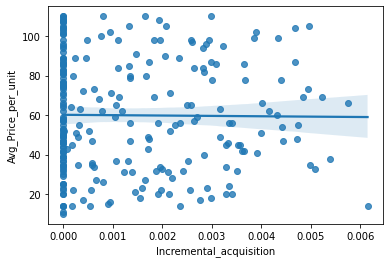

In [55]:
sns.regplot(y=txt_dfclean['Avg_Price_per_unit'],x=txt_dfclean['Incremental_acquisition'])

<AxesSubplot:xlabel='Cost_per_unit', ylabel='Avg_Price_per_unit'>

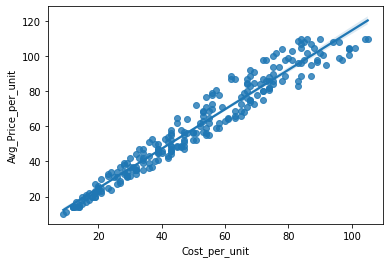

In [127]:
sns.regplot(y=txt_dfclean['Avg_Price_per_unit'],x=txt_dfclean['Cost_per_unit'])

<AxesSubplot:xlabel='Average_units_sold', ylabel='Avg_Price_per_unit'>

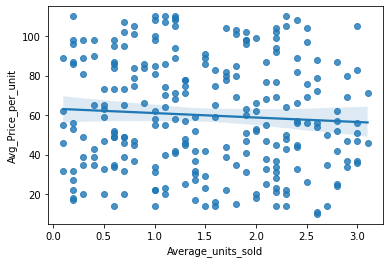

In [128]:
sns.regplot(y=txt_dfclean['Avg_Price_per_unit'],x=txt_dfclean['Average_units_sold'])

<AxesSubplot:xlabel='Average_Profit_per_unit', ylabel='Avg_Price_per_unit'>

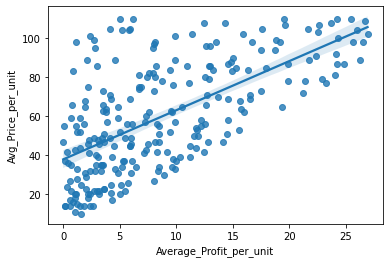

In [129]:
sns.regplot(y=txt_dfclean['Avg_Price_per_unit'],x=txt_dfclean['Average_Profit_per_unit'])

<AxesSubplot:xlabel='Increase_sale_volume', ylabel='Avg_Price_per_unit'>

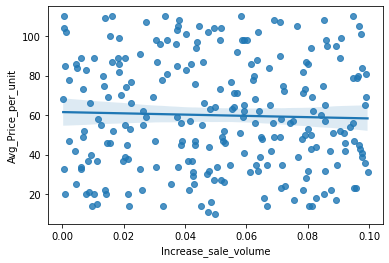

In [130]:
sns.regplot(y=txt_dfclean['Avg_Price_per_unit'],x=txt_dfclean['Increase_sale_volume'])

**Conclusion**

Lasso             : 0.61<br>
Ridge             : 0.81<br>
Decision tree     : 0.82<br>
Linear regression : 0.999<br>
Random Forest : 0.999